# 1. Парадокс инспектора

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам.
Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут
ближайшим автобусом.

Проведите $10^4$ экспериментов и с их помощью:

a) [10] Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже
ли визуально распределение на нормальное?

б) [10] Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

в) [10] Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный
от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

г) [10] Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

№1 (a)

Будем считать, что в первом автобусе 5 пассажиров

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
minutes = 12 * 60
max_avt = minutes / 5
max_avt

144.0

In [3]:
u = np.array([5]*10000).reshape(10000, 1)

In [4]:
np.random.seed(444)
a = (np.random.binomial(1, 0.5, 144 * 10**4) + 1) * 5
a

array([10, 10, 10, ...,  5, 10, 10])

In [5]:
a = a.reshape(-1, 144)
a = np.hstack((u, a))
a

array([[ 5, 10, 10, ...,  5, 10,  5],
       [ 5,  5,  5, ..., 10,  5, 10],
       [ 5,  5,  5, ..., 10,  5, 10],
       ...,
       [ 5,  5, 10, ..., 10,  5,  5],
       [ 5, 10,  5, ...,  5,  5, 10],
       [ 5,  5,  5, ...,  5, 10, 10]])

In [6]:
a_cumsum = np.cumsum(a, axis=1)
a_cumsum

array([[   5,   15,   25, ..., 1075, 1085, 1090],
       [   5,   10,   15, ..., 1090, 1095, 1105],
       [   5,   10,   15, ..., 1040, 1045, 1055],
       ...,
       [   5,   10,   20, ..., 1020, 1025, 1030],
       [   5,   15,   20, ..., 1065, 1070, 1080],
       [   5,   10,   15, ..., 1090, 1100, 1110]], dtype=int32)

In [7]:
p = np.where(a_cumsum <= 725)[1]
b = np.where(p == 0)[0]
b

array([     0,     96,    191, ..., 967769, 967870, 967965], dtype=int64)

In [8]:
c = p[b-1]
c

array([ 98,  95,  94, ...,  92, 100,  94], dtype=int64)

In [9]:
c = np.append(c[1:], c[0])
c

array([ 95,  94,  98, ..., 100,  94,  98], dtype=int64)

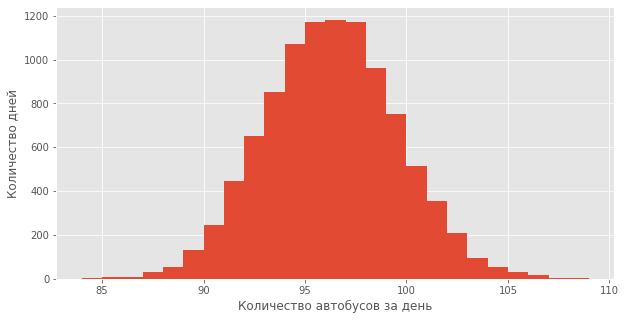

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(c, bins=25)
plt.xlabel('Количество автобусов за день')
plt.ylabel('Количество дней');

Визуально данное распределение похоже на нормальное

б)

In [11]:
np.random.seed(444)
n = np.random.randint(0, c)
n

array([ 3, 23,  8, ..., 98,  6, 94])

In [12]:
q = a[:, n]
q = q.T
q = np.diagonal(q)
q

array([10,  5,  5, ...,  5,  5, 10])

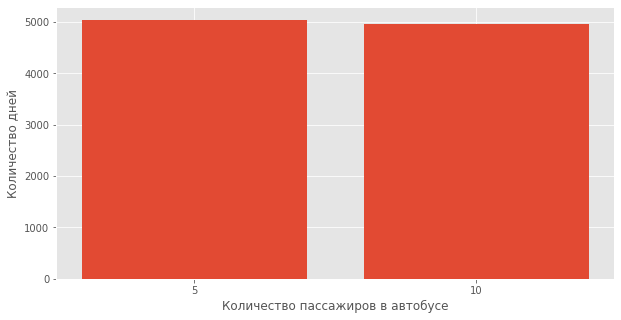

In [13]:
num = ["5", "10"]
counts = [len(np.where(q==5)[0]), len(np.where(q==10)[0])]
plt.figure(figsize=(10, 5))
plt.bar(num, counts)
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество дней');

Оценим математическое ожидание

In [14]:
e = (5 * len(np.where(q==5)[0]) + 10 * len(np.where(q==10)[0])) / 10000
e

7.479

Оценим дисперсию

In [15]:
var = np.var(q, ddof=1)
var

6.250184018401841

в)

In [16]:
np.random.seed(444)
w = np.random.uniform(5, 725, 10000)
w = w.reshape(10000, 1)
w

array([[609.33995416],
       [596.33237485],
       [467.38915865],
       ...,
       [299.37671284],
       [454.99285733],
       [ 77.51985765]])

In [17]:
z = np.where(w >= a_cumsum)[1]
z

array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64)

In [18]:
z1 = np.where(z == 0)[0]
z1

array([     0,     80,    158, ..., 482493, 482534, 482593], dtype=int64)

In [19]:
c = z[z1-1]
c += 1
c = np.append(c[1:], c[0])
c

array([80, 78, 61, ..., 41, 59, 12], dtype=int64)

In [20]:
q = a[:, c]
q = q.T
q = np.diagonal(q)
q

array([10, 10, 10, ..., 10, 10,  5])

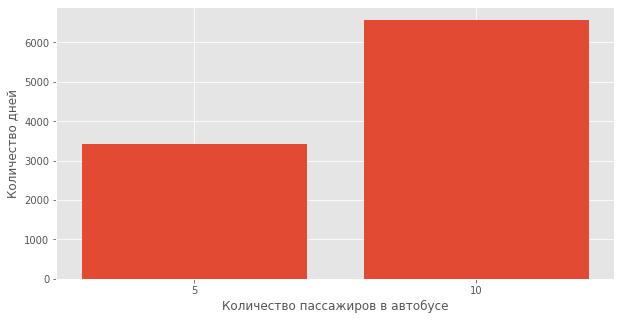

In [21]:
num = ["5", "10"]
counts = [len(np.where(q==5)[0]), len(np.where(q==10)[0])]
plt.figure(figsize=(10, 5))
plt.bar(num, counts)
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество дней');

Оценим математическое ожидание


In [22]:
e = (5 * len(np.where(q==5)[0]) + 10 * len(np.where(q==10)[0])) / 10000
e

8.2875

Оценим дисперсию

In [23]:
var = np.var(q, ddof=1)
var

5.630406790679069

г) 

In [24]:
u = np.array([5]*10000).reshape(10000, 1)

In [25]:
np.random.seed(444)
a = np.random.exponential(10, 144*10**4)
a

array([18.28595963, 17.22018682, 10.27801133, ...,  2.76982507,
        7.07499352, 13.01036623])

In [26]:
a = a.reshape(-1, 144)
a = np.hstack((u, a))
a

array([[ 5.        , 18.28595963, 17.22018682, ...,  2.99714268,
        13.00688282,  5.2141059 ],
       [ 5.        ,  3.21950257,  5.60074334, ...,  7.02212788,
         2.38175834, 13.5418941 ],
       [ 5.        ,  3.12904556,  5.19553961, ...,  8.99096579,
         1.14757312, 30.23051328],
       ...,
       [ 5.        ,  2.68047539,  8.50982819, ..., 16.326945  ,
         6.50297047,  0.25377359],
       [ 5.        , 21.16039228,  2.29280304, ...,  4.64729554,
         2.06250661,  9.1268665 ],
       [ 5.        ,  0.12667607,  6.46974304, ...,  2.76982507,
         7.07499352, 13.01036623]])

In [27]:
a_cumsum = np.cumsum(a, axis=1)
a_cumsum

array([[   5.        ,   23.28595963,   40.50614645, ..., 1498.67590605,
        1511.68278886, 1516.89689477],
       [   5.        ,    8.21950257,   13.82024591, ..., 1382.50200639,
        1384.88376473, 1398.42565883],
       [   5.        ,    8.12904556,   13.32458517, ..., 1293.51276542,
        1294.66033854, 1324.89085182],
       ...,
       [   5.        ,    7.68047539,   16.19030358, ..., 1234.80905971,
        1241.31203018, 1241.56580377],
       [   5.        ,   26.16039228,   28.45319532, ..., 1489.6139137 ,
        1491.67642031, 1500.80328681],
       [   5.        ,    5.12667607,   11.59641911, ..., 1370.5017178 ,
        1377.57671132, 1390.58707755]])

In [28]:
p = np.where(a_cumsum <= 725)[1]
b = np.where(p == 0)[0]
b

array([     0,     75,    151, ..., 728617, 728696, 728769], dtype=int64)

In [29]:
c = p[b-1]
c

array([73, 74, 75, ..., 68, 78, 72], dtype=int64)

In [30]:
c = np.append(c[1:], c[0])
c

array([74, 75, 71, ..., 78, 72, 73], dtype=int64)

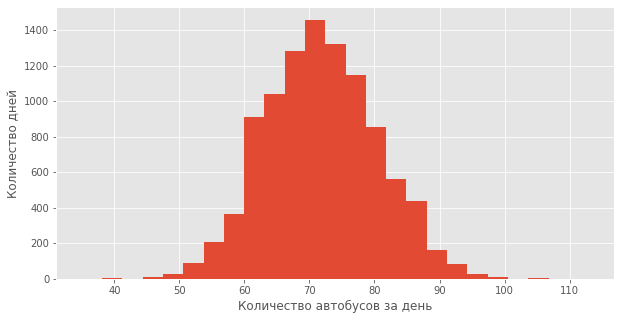

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(c, bins=25)
plt.xlabel('Количество автобусов за день')
plt.ylabel('Количество дней');

Визуально данное распределение похоже на нормальное

б)

In [32]:
np.random.seed(444)
n = np.random.randint(0, c)
n

array([ 3, 23,  8, ..., 53, 66, 27])

In [33]:
k = np.floor(a)
k

array([[ 5., 18., 17., ...,  2., 13.,  5.],
       [ 5.,  3.,  5., ...,  7.,  2., 13.],
       [ 5.,  3.,  5., ...,  8.,  1., 30.],
       ...,
       [ 5.,  2.,  8., ..., 16.,  6.,  0.],
       [ 5., 21.,  2., ...,  4.,  2.,  9.],
       [ 5.,  0.,  6., ...,  2.,  7., 13.]])

In [34]:
q = k[:, n]
q = q.T
q = np.diagonal(q)
q

array([10.,  0.,  3., ...,  1.,  5.,  6.])

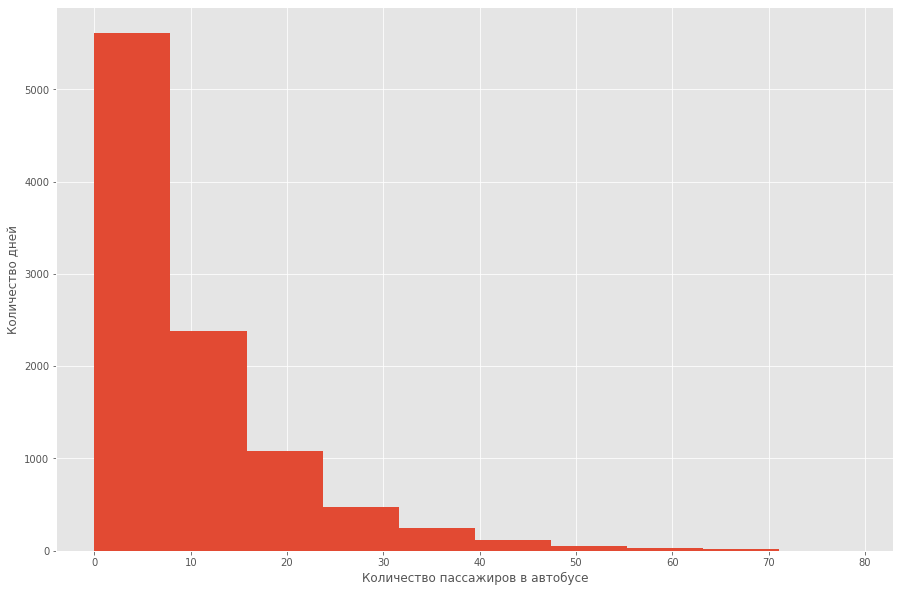

In [35]:
plt.figure(figsize=(15, 10))
plt.hist(q)
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество дней');

Оценим математическое ожидание

In [36]:
e = np.mean(q)
e

9.5092

Оценим дисперсию

In [37]:
var = np.var(q, ddof=1)
var

102.30354571457147

в)

In [38]:
np.random.seed(444)
w = np.random.uniform(5, 725, 10000)
w = w.reshape(10000, 1)
w

array([[609.33995416],
       [596.33237485],
       [467.38915865],
       ...,
       [299.37671284],
       [454.99285733],
       [ 77.51985765]])

In [39]:
z = np.where(w >= a_cumsum)[1]
z

array([0, 1, 2, ..., 5, 6, 7], dtype=int64)

In [40]:
z1 = np.where(z == 0)[0]
z1

array([     0,     65,    126, ..., 366526, 366559, 366603], dtype=int64)

In [41]:
c = z[z1-1]
c += 1
c = np.append(c[1:], c[0])
c

array([65, 61, 47, ..., 33, 44,  8], dtype=int64)

In [42]:
q = k[:, c]
q = q.T
q = np.diagonal(q)
q

array([ 7.,  1., 43., ...,  6., 28.,  6.])

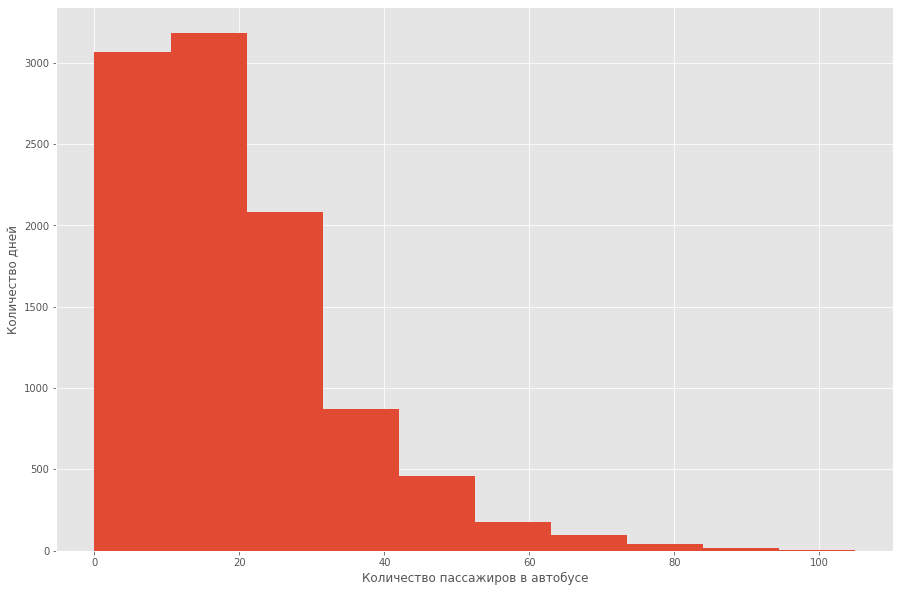

In [43]:
plt.figure(figsize=(15, 10))
plt.hist(q)
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество дней');

Оценим математическое ожидание


In [44]:
e = np.mean(q)
e

19.3977

Оценим дисперсию

In [45]:
var = np.var(q, ddof=1)
var

202.626597369737

# Парадокс Хуана Мануэля Родригеса Паррондо.

У Атоса, Портоса и Арамиса по 1000 франков.

Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью 0.49 и
проигрывает один франк с вероятностью 0.51.

Портос ходит в казино Б, где ситуация интереснее :) Если богатство посетителя кратно трём, то посетитель выигрывает франк с вероятностью 0.09 и проигрывает один франк с вероятностью 0.91.\
Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью 0.74 и
проигрывает один франк с вероятностью 0.26.

Арамис каждый раз выбирает казино А или казино Б равновероятно.

Проведите $10^4$ симуляций эволюции благосостояния Атоса, Портоса и Арамиса. Каждая симуляция
предусматривает 1000 посещений казино. Все три игрока все деньги носят с собой и ни на что не
тратят :)

а) [10] Постройте на графике 10 случайных траекторий изменений богатства Атоса, по горизонтали —номер посещени казино, по вертикали —богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.\
б) [10] Постройте на графике 10 случайных траекторий изменений богатства Портоса, по горизонтали —номер посещени казино, по вертикали —богатство. На том же графике постройте
усреднённую по всем экспериментам тракторию изменения богатства.\
в) [10] Постройте на графике 10 случайных траекторий изменений богатства Арамиса, по горизонтали —номер посещени казино, по вертикали —богатство. На том же графике постройте
усреднённую по всем экспериментам тракторию изменения богатства.

a)

In [46]:
a = np.array([1000] * 10000).reshape(10000, 1)
a

array([[1000],
       [1000],
       [1000],
       ...,
       [1000],
       [1000],
       [1000]])

In [47]:
np.random.seed(444)
a1 = np.random.choice([-1, 1], size=10000000, replace=True, p=[0.51, 0.49])
a1

array([ 1,  1,  1, ..., -1, -1, -1])

In [48]:
a1 = a1.reshape(10000, 1000)
a1

array([[ 1,  1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1, -1],
       ...,
       [ 1,  1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [49]:
a1 = np.hstack((a, a1))
a1

array([[1000,    1,    1, ...,    1,    1,    1],
       [1000,   -1,   -1, ...,    1,    1,   -1],
       [1000,    1,    1, ...,    1,    1,   -1],
       ...,
       [1000,    1,    1, ...,   -1,   -1,   -1],
       [1000,   -1,    1, ...,   -1,    1,    1],
       [1000,   -1,   -1, ...,   -1,   -1,   -1]])

In [50]:
a_cumsum = np.cumsum(a1, axis=1)
a_cumsum

array([[1000, 1001, 1002, ..., 1000, 1001, 1002],
       [1000,  999,  998, ...,  960,  961,  960],
       [1000, 1001, 1002, ...,  922,  923,  922],
       ...,
       [1000, 1001, 1002, ...,  998,  997,  996],
       [1000,  999, 1000, ..., 1030, 1031, 1032],
       [1000,  999,  998, ...,  942,  941,  940]], dtype=int32)

In [51]:
mean = np.mean(a_cumsum, axis=0)
mean

array([1000.    ,  999.978 ,  999.964 , ...,  980.5132,  980.5076,
        980.487 ])

In [52]:
np.random.seed(444)
a11 = np.random.choice(range(10000), size=10)
a11

array([7555, 8983, 3336,  948, 6631, 3212, 4790, 5615,  154, 1442])

In [53]:
a_cumsum[a11]

array([[1000,  999,  998, ...,  950,  951,  950],
       [1000, 1001, 1002, ...,  978,  979,  980],
       [1000,  999, 1000, ...,  952,  951,  952],
       ...,
       [1000, 1001, 1002, ..., 1008, 1009, 1010],
       [1000,  999, 1000, ..., 1062, 1061, 1060],
       [1000,  999,  998, ..., 1040, 1039, 1038]], dtype=int32)

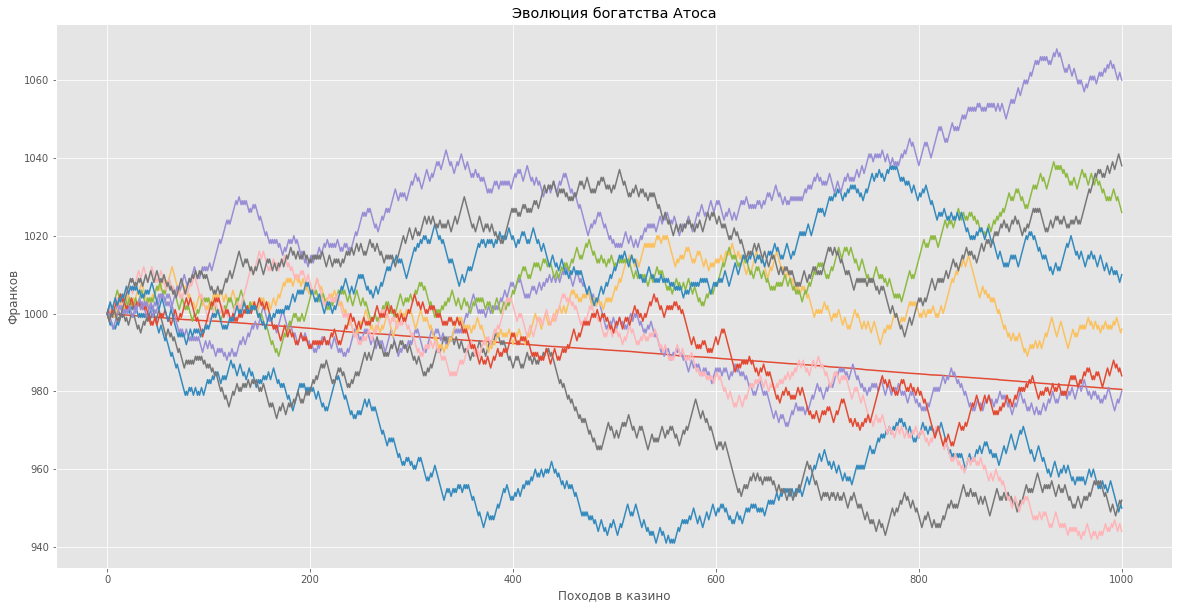

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1001), mean)
plt.plot(np.arange(1001), a_cumsum[a11][0])
plt.plot(np.arange(1001), a_cumsum[a11][1])
plt.plot(np.arange(1001), a_cumsum[a11][2])
plt.plot(np.arange(1001), a_cumsum[a11][3])
plt.plot(np.arange(1001), a_cumsum[a11][4])
plt.plot(np.arange(1001), a_cumsum[a11][5])
plt.plot(np.arange(1001), a_cumsum[a11][6])
plt.plot(np.arange(1001), a_cumsum[a11][7])
plt.plot(np.arange(1001), a_cumsum[a11][8])
plt.plot(np.arange(1001), a_cumsum[a11][9])
plt.title('Эволюция богатства Атоса')
plt.xlabel('Походов в казино')
plt.ylabel('Франков')
plt.show()

б)

In [55]:
np.random.seed(444)
b2 = np.random.choice([-1, 1], size=10000000, replace=True, p=[0.91, 0.09])
b3 = np.random.choice([-1, 1], size=10000000, replace=True, p=[0.26, 0.74])

In [56]:
b4 = []

In [57]:
g = -1
for i in range(10000):
    b1 = 1000
    for j in range(1000):
        g += 1
        if b1 % 3 == 0:
            b4.append(b2[g])
            b1 += b2[g]
        else:
            b4.append(b3[g])
            b1 += b3[g]


In [58]:
b4 = np.array(b4)
b4

array([ 1,  1, -1, ..., -1,  1, -1])

In [59]:
b5 = np.array([1000] * 10000).reshape(10000, 1)
b5

array([[1000],
       [1000],
       [1000],
       ...,
       [1000],
       [1000],
       [1000]])

In [60]:
b4 = b4.reshape(10000, 1000)
b4

array([[ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ...,
       [ 1,  1, -1, ..., -1,  1, -1],
       [ 1, -1, -1, ..., -1, -1,  1],
       [ 1,  1, -1, ..., -1,  1, -1]])

In [61]:
b4 = np.hstack((b5, b4))
b4

array([[1000,    1,    1, ...,    1,    1,    1],
       [1000,    1,    1, ...,    1,   -1,   -1],
       [1000,   -1,    1, ...,    1,    1,   -1],
       ...,
       [1000,    1,    1, ...,   -1,    1,   -1],
       [1000,    1,   -1, ...,   -1,   -1,    1],
       [1000,    1,    1, ...,   -1,    1,   -1]])

In [62]:
b_cumsum = np.cumsum(b4, axis=1)
b_cumsum

array([[1000, 1001, 1002, ...,  970,  971,  972],
       [1000, 1001, 1002, ..., 1016, 1015, 1014],
       [1000,  999, 1000, ...,  980,  981,  980],
       ...,
       [1000, 1001, 1002, ..., 1046, 1047, 1046],
       [1000, 1001, 1000, ..., 1040, 1039, 1040],
       [1000, 1001, 1002, ..., 1004, 1005, 1004]], dtype=int32)

In [63]:
bmean = np.mean(b_cumsum, axis=0)
bmean

array([1000.    , 1000.4762, 1000.6254, ...,  983.3048,  983.276 ,
        983.2732])

In [64]:
np.random.seed(444)
b11 = np.random.choice(range(10000), size=10)
b11

array([7555, 8983, 3336,  948, 6631, 3212, 4790, 5615,  154, 1442])

In [65]:
b_cumsum[b11]

array([[1000, 1001, 1002, ...,  972,  973,  972],
       [1000, 1001, 1002, ..., 1018, 1019, 1020],
       [1000, 1001, 1002, ...,  960,  959,  960],
       ...,
       [1000, 1001, 1002, ...,  988,  989,  990],
       [1000,  999, 1000, ..., 1008, 1007, 1008],
       [1000, 1001, 1002, ...,  974,  975,  974]], dtype=int32)

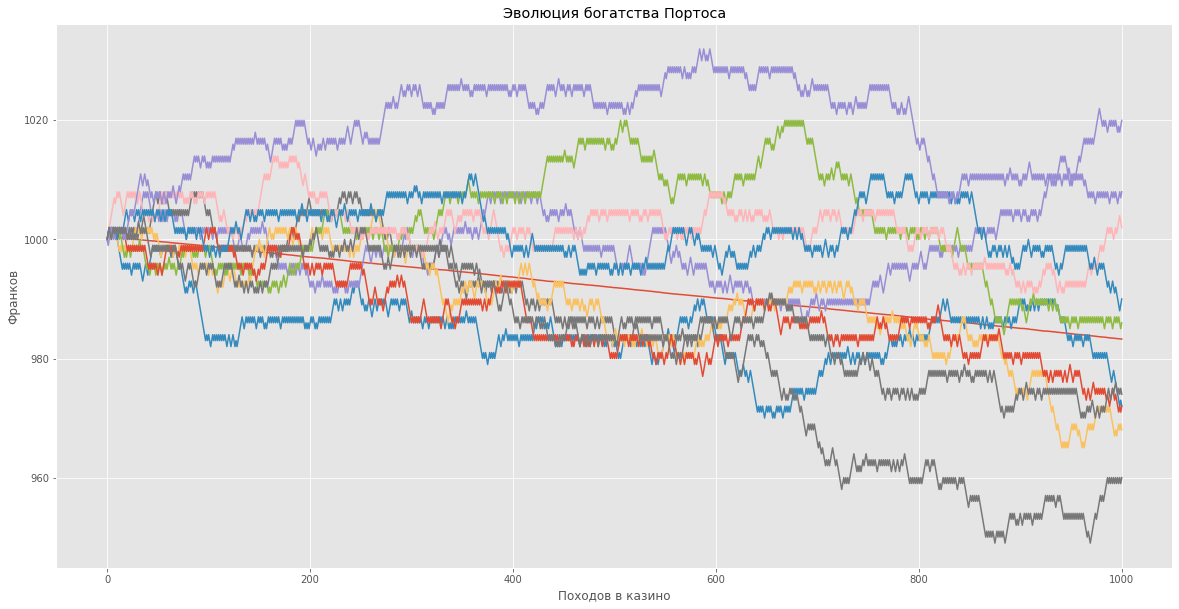

In [66]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1001), bmean)
plt.plot(np.arange(1001), b_cumsum[b11][0])
plt.plot(np.arange(1001), b_cumsum[b11][1])
plt.plot(np.arange(1001), b_cumsum[b11][2])
plt.plot(np.arange(1001), b_cumsum[b11][3])
plt.plot(np.arange(1001), b_cumsum[b11][4])
plt.plot(np.arange(1001), b_cumsum[b11][5])
plt.plot(np.arange(1001), b_cumsum[b11][6])
plt.plot(np.arange(1001), b_cumsum[b11][7])
plt.plot(np.arange(1001), b_cumsum[b11][8])
plt.plot(np.arange(1001), b_cumsum[b11][9])
plt.title('Эволюция богатства Портоса')
plt.xlabel('Походов в казино')
plt.ylabel('Франков')
plt.show()

в)

In [67]:
np.random.seed(444)
c7 = np.random.choice([1, 2], size=10000000, replace=True, p=[0.5, 0.5])
c1 = np.random.choice([-1, 1], size=10000000, replace=True, p=[0.51, 0.49])
c2 = np.random.choice([-1, 1], size=10000000, replace=True, p=[0.91, 0.09])
c3 = np.random.choice([-1, 1], size=10000000, replace=True, p=[0.26, 0.74])

In [68]:
с = []

In [69]:
g = -1
c = []
for i in range(10000):
    b1 = 1000
    for j in range(1000):
        g += 1
        if c7[g] == 1:
            c.append(c1[g])
            b1 += c1[g]
        else:
            if b1 % 3 == 0:
                c.append(c2[g])
                b1 += c2[g]
            else:
                c.append(c3[g])
                b1 += c3[g]


In [70]:
c = np.array(c)
c

array([ 1,  1, -1, ..., -1,  1, -1])

In [71]:
c5 = np.array([1000] * 10000).reshape(10000, 1)
c5

array([[1000],
       [1000],
       [1000],
       ...,
       [1000],
       [1000],
       [1000]])

In [72]:
c = c.reshape(10000, 1000)
c

array([[ 1,  1, -1, ...,  1, -1,  1],
       [ 1,  1, -1, ..., -1,  1, -1],
       [ 1,  1, -1, ...,  1, -1,  1],
       ...,
       [ 1, -1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ...,  1, -1, -1],
       [ 1,  1,  1, ..., -1,  1, -1]])

In [73]:
c = np.hstack((c5, c))
c

array([[1000,    1,    1, ...,    1,   -1,    1],
       [1000,    1,    1, ...,   -1,    1,   -1],
       [1000,    1,    1, ...,    1,   -1,    1],
       ...,
       [1000,    1,   -1, ...,    1,    1,   -1],
       [1000,   -1,   -1, ...,    1,   -1,   -1],
       [1000,    1,    1, ...,   -1,    1,   -1]])

In [74]:
c_cumsum = np.cumsum(c, axis=1)
c_cumsum

array([[1000, 1001, 1002, ...,  966,  965,  966],
       [1000, 1001, 1002, ..., 1028, 1029, 1028],
       [1000, 1001, 1002, ..., 1022, 1021, 1022],
       ...,
       [1000, 1001, 1000, ..., 1036, 1037, 1036],
       [1000,  999,  998, ..., 1006, 1005, 1004],
       [1000, 1001, 1002, ...,  974,  975,  974]], dtype=int32)

In [75]:
cmean = np.mean(c_cumsum, axis=0)
cmean

array([1000.    , 1000.2346, 1000.211 , ..., 1006.5136, 1006.5176,
       1006.552 ])

In [76]:
np.random.seed(444)
c11 = np.random.choice(range(10000), size=10)
c11

array([7555, 8983, 3336,  948, 6631, 3212, 4790, 5615,  154, 1442])

In [77]:
c_cumsum[c11]

array([[1000, 1001, 1002, ..., 1004, 1005, 1004],
       [1000, 1001, 1002, ..., 1016, 1017, 1016],
       [1000, 1001, 1000, ..., 1026, 1027, 1028],
       ...,
       [1000, 1001, 1000, ..., 1000, 1001, 1000],
       [1000,  999,  998, ...,  960,  961,  960],
       [1000, 1001, 1002, ...,  984,  983,  982]], dtype=int32)

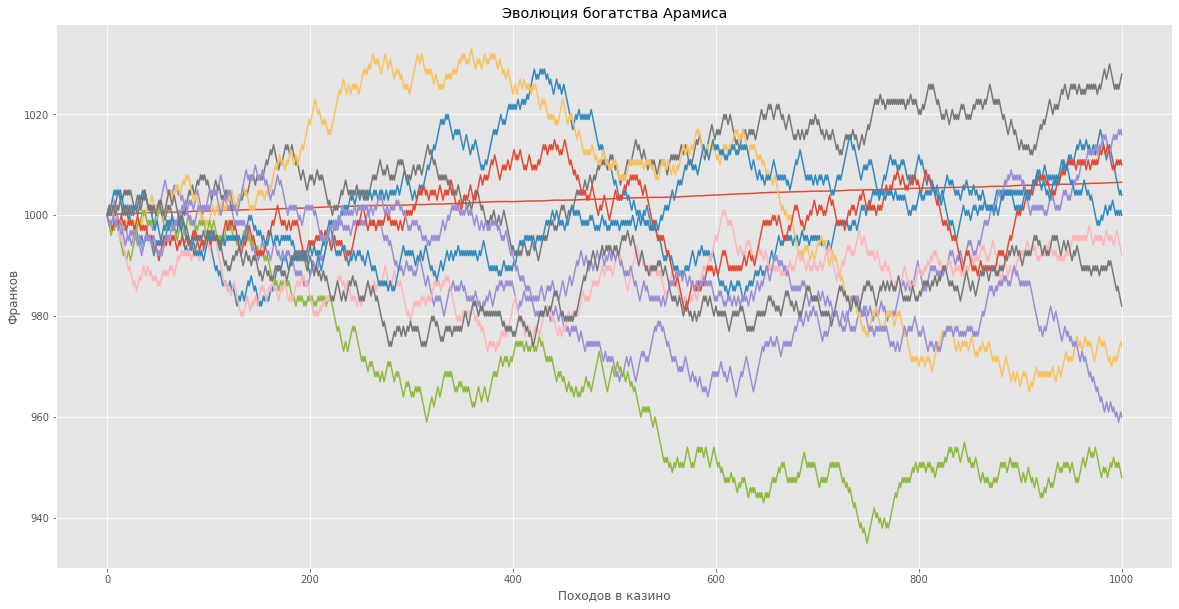

In [78]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1001), cmean)
plt.plot(np.arange(1001), c_cumsum[c11][0])
plt.plot(np.arange(1001), c_cumsum[c11][1])
plt.plot(np.arange(1001), c_cumsum[c11][2])
plt.plot(np.arange(1001), c_cumsum[c11][3])
plt.plot(np.arange(1001), c_cumsum[c11][4])
plt.plot(np.arange(1001), c_cumsum[c11][5])
plt.plot(np.arange(1001), c_cumsum[c11][6])
plt.plot(np.arange(1001), c_cumsum[c11][7])
plt.plot(np.arange(1001), c_cumsum[c11][8])
plt.plot(np.arange(1001), c_cumsum[c11][9])
plt.title('Эволюция богатства Арамиса')
plt.xlabel('Походов в казино')
plt.ylabel('Франков')
plt.show()

# Парадокс Берксона.

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо
аппроксимируются нормальным распределением с ожиданием 60 и стандартным отклонением 10.

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших
более n баллов в сумме по русскому и математике.

Для каждого n от 80 до 160 с шагом 5 случайно создайте $10^4$ школьников и поделите их на прошедших и не прошедших в УШЭ.

а) [10] Постройте график числа прошедших в УШЭ в зависимости от n.\
б) [10] Постройте график выборочной корреляции между результатами по русскому и математике
в зависимости от n среди прошедших в УШЭ.\
в) [10] Постройте график выборочной корреляции между результатами по русскому и математике
в зависимости от n среди не прошедших в УШЭ.

а)

In [79]:
np.random.seed(444)
rus = np.random.normal(60, 10, 10**4 * 17)
mat = np.random.normal(60, 10, 10**4 * 17)
p = rus + mat
p = p.reshape(17, -1)
p = np.floor(p)
p

array([[126., 108., 136., ..., 132., 112., 103.],
       [115., 128., 115., ..., 113., 134., 142.],
       [ 97., 120., 116., ...,  93., 141., 132.],
       ...,
       [127., 121., 146., ..., 102., 120.,  98.],
       [109., 123.,  96., ...,  99., 122., 129.],
       [ 92., 109., 103., ..., 123., 105., 125.]])

In [80]:
n = np.arange(80, 165, 5).reshape(-1,1)
n

array([[ 80],
       [ 85],
       [ 90],
       [ 95],
       [100],
       [105],
       [110],
       [115],
       [120],
       [125],
       [130],
       [135],
       [140],
       [145],
       [150],
       [155],
       [160]])

In [81]:
o = np.where(n <= p)[1]
o

array([   0,    1,    2, ..., 9783, 9860, 9891], dtype=int64)

In [82]:
u = np.array([])
for i in range (len(o) - 1):
    if o[i] >= o[i + 1]:
        u = np.append(u, i + 1)
u

array([ 9976., 19908., 29750., 39324., 48547., 57113., 64689., 71081.,
       76020., 79616., 82093., 83508., 84275., 84645., 84795., 84874.])

In [83]:
pro = np.split(o, indices_or_sections=list(map(int, u)), axis=0)
pro

[array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),
 array([   3,    4,    5, ..., 9997, 9998, 9999], dtype=int64),
 array([   0,    1,    2, ..., 9996, 9997, 9999], dtype=int64),
 array([   1,    2,    5, ..., 9995, 9997, 9999], dtype=int64),
 array([   2,    4,    5, ..., 9990, 9994, 9997], dtype=int64),
 array([   0,    4,    5, ..., 9984, 9990, 9994], dtype=int64),
 array([   2,    9,   27, ..., 9991, 9992, 9999], dtype=int64),
 array([   2,   40,   45,   47,   49,   68,   72,   85,   94,   96,   97,
         106,  161,  170,  172,  193,  204,  225,  232,  249,  253,  273,
         279,  293,  307,  311,  320,  352,  377,  386,  394,  415,  420,
         4

In [84]:
o1 = np.where(n > p)[1]
o1

array([  12,   48,  265, ..., 9997, 9998, 9999], dtype=int64)

In [85]:
u1 = np.array([])
for j in range (len(o1) - 1):
    if o1[j] >= o1[j + 1]:
        u1 = np.append(u1, j + 1)
u1

array([2.4000e+01, 9.2000e+01, 2.5000e+02, 6.7600e+02, 1.4530e+03,
       2.8870e+03, 5.3110e+03, 8.9190e+03, 1.3980e+04, 2.0384e+04,
       2.7907e+04, 3.6492e+04, 4.5725e+04, 5.5355e+04, 6.5205e+04,
       7.5126e+04])

In [86]:
ne_pro = np.split(o1, indices_or_sections=list(map(int, u1)), axis=0)
ne_pro

[array([  12,   48,  265,  315,  363,  861, 1525, 1626, 2332, 2603, 3317,
        3489, 4753, 5196, 6316, 6358, 7328, 7445, 8160, 8270, 9034, 9395,
        9826, 9943], dtype=int64),
 array([ 147,  357,  571,  710,  764,  865, 1414, 1634, 1662, 1948, 2147,
        2733, 2823, 3682, 3719, 3731, 3786, 3883, 4005, 4099, 4126, 4137,
        4204, 4253, 4466, 5021, 5025, 5175, 5429, 5544, 5637, 6220, 6286,
        6424, 6458, 6517, 6560, 6562, 6937, 7103, 7137, 7233, 7311, 7361,
        7501, 7593, 7614, 7957, 8208, 8252, 8385, 8524, 8554, 8625, 8972,
        9060, 9112, 9166, 9197, 9250, 9382, 9470, 9623, 9648, 9676, 9734,
        9792, 9907], dtype=int64),
 array([  44,   52,   56,  124,  137,  171,  315,  544,  900,  940,  994,
        1087, 1114, 1215, 1217, 1308, 1341, 1366, 1408, 1413, 1462, 1522,
        1601, 1643, 1644, 1686, 1946, 1950, 1991, 2068, 2089, 2150, 2154,
        2215, 2273, 2315, 2382, 2483, 2511, 2557, 2613, 2645, 2742, 2790,
        2848, 2857, 2870, 2953, 3085, 3226

In [87]:
np.array(list(map(len, pro)))

array([9976, 9932, 9842, 9574, 9223, 8566, 7576, 6392, 4939, 3596, 2477,
       1415,  767,  370,  150,   79,   23])

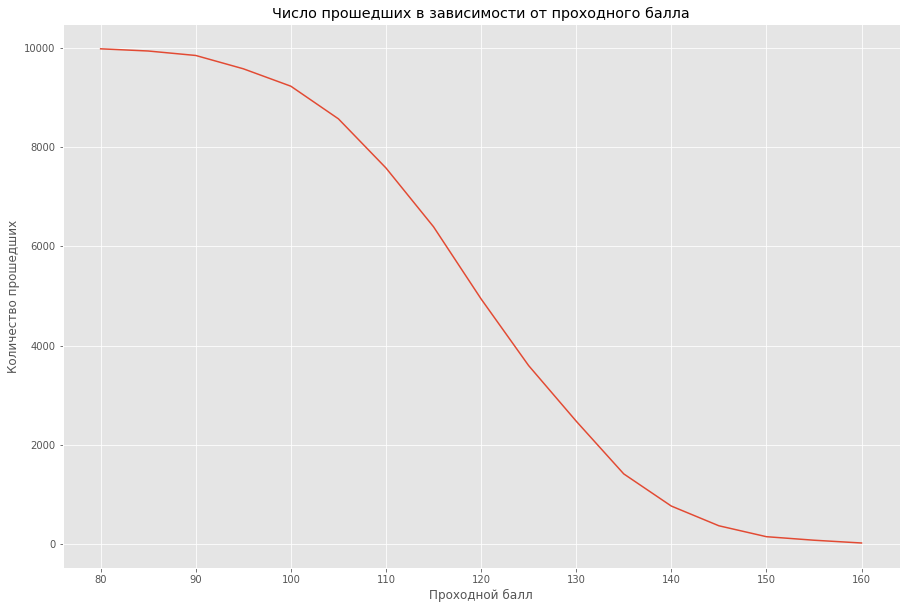

In [88]:
plt.figure(figsize=(15, 10))
plt.plot(n, np.array(list(map(len, pro))))
plt.title('Число прошедших в зависимости от проходного балла')
plt.xlabel('Проходной балл')
plt.ylabel('Количество прошедших')
plt.show()

б)

In [89]:
rus = rus.reshape(17, -1)
rus = np.floor(rus)
rus

array([[63., 63., 73., ..., 70., 51., 39.],
       [57., 64., 57., ..., 60., 65., 76.],
       [54., 65., 54., ..., 45., 78., 71.],
       ...,
       [68., 70., 75., ..., 59., 62., 44.],
       [58., 66., 39., ..., 45., 62., 66.],
       [55., 52., 46., ..., 63., 61., 67.]])

In [90]:
mat = mat.reshape(17, -1)
mat = np.floor(mat)
mat

array([[62., 44., 62., ..., 61., 61., 63.],
       [58., 64., 58., ..., 53., 69., 65.],
       [43., 54., 61., ..., 48., 62., 60.],
       ...,
       [59., 50., 71., ..., 43., 57., 54.],
       [51., 57., 57., ..., 54., 60., 62.],
       [36., 57., 56., ..., 60., 44., 58.]])

In [91]:
pro_rus = []
for i in range(len(pro)):
    pro_rus.append(rus[i][pro[i]])
pro_rus

[array([63., 63., 73., ..., 70., 51., 39.]),
 array([57., 64., 57., ..., 60., 65., 76.]),
 array([54., 65., 54., ..., 45., 78., 71.]),
 array([52., 72., 76., ..., 64., 61., 69.]),
 array([55., 54., 56., ..., 69., 67., 56.]),
 array([57., 75., 49., ..., 51., 51., 51.]),
 array([49., 53., 66., ..., 68., 66., 59.]),
 array([60., 84., 46., ..., 71., 67., 53.]),
 array([65., 73., 67., ..., 75., 77., 74.]),
 array([88., 64., 81., ..., 64., 77., 78.]),
 array([86., 71., 64., ..., 74., 67., 71.]),
 array([69., 75., 61., ..., 65., 76., 73.]),
 array([60., 76., 69., 76., 66., 70., 63., 72., 64., 73., 76., 65., 77.,
        68., 79., 73., 69., 74., 88., 61., 77., 76., 68., 65., 69., 62.,
        71., 69., 80., 74., 72., 64., 68., 81., 73., 65., 55., 66., 62.,
        82., 72., 76., 58., 91., 79., 78., 64., 81., 76., 59., 58., 72.,
        78., 65., 78., 86., 83., 69., 81., 69., 87., 73., 66., 73., 77.,
        70., 86., 81., 79., 64., 59., 69., 65., 63., 68., 69., 74., 68.,
        74., 85., 69.,

In [92]:
pro_mat = []
for i in range(len(pro)):
    pro_mat.append(mat[i][pro[i]])
pro_mat

[array([62., 44., 62., ..., 61., 61., 63.]),
 array([58., 64., 58., ..., 53., 69., 65.]),
 array([43., 54., 61., ..., 48., 62., 60.]),
 array([61., 60., 61., ..., 58., 50., 50.]),
 array([76., 56., 60., ..., 61., 70., 77.]),
 array([63., 69., 59., ..., 56., 53., 59.]),
 array([75., 67., 54., ..., 46., 57., 73.]),
 array([69., 51., 71., ..., 54., 74., 73.]),
 array([56., 50., 63., ..., 70., 58., 53.]),
 array([75., 77., 62., ..., 73., 51., 72.]),
 array([66., 81., 72., ..., 63., 66., 61.]),
 array([71., 62., 78., ..., 76., 80., 63.]),
 array([ 92.,  74.,  75.,  65.,  73.,  76.,  76.,  80.,  75.,  73.,  66.,
         85.,  68.,  79.,  69.,  70.,  76.,  79.,  52.,  82.,  65.,  80.,
         72.,  78.,  72.,  86.,  69.,  76.,  61.,  77.,  68.,  75.,  73.,
         64.,  73.,  78.,  85.,  75.,  80.,  67.,  74.,  66.,  94.,  55.,
         74.,  63.,  76.,  60.,  63.,  84.,  82.,  74.,  67.,  82.,  65.,
         68.,  59.,  72.,  59.,  73.,  68.,  69.,  74.,  70.,  62.,  71.,
         66.,  6

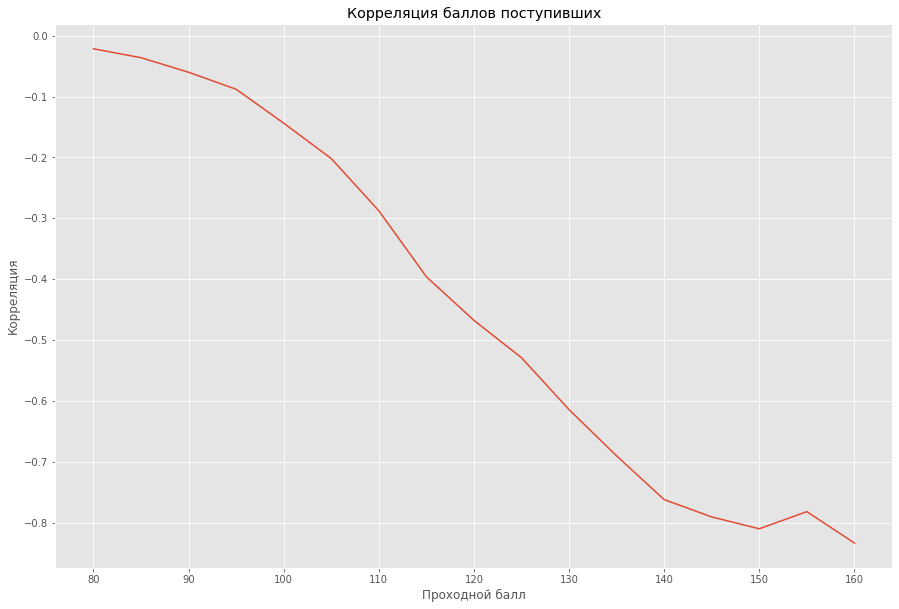

In [93]:
def correlation(xs, ys): 
    return np.cov(xs, ys)[0][1] / (np.var(xs, ddof=1)**0.5 * np.var(ys, ddof=1)**0.5)
corr = np.array([])
for i in range(17):
    corr = np.append(corr, correlation(pro_rus[i], pro_mat[i]))

plt.figure(figsize=(15, 10))
plt.plot(n, corr)
plt.title('Корреляция баллов поступивших')
plt.xlabel('Проходной балл')
plt.ylabel('Корреляция')
plt.show()

в)

In [94]:
ne_pro_rus = []
for i in range(len(ne_pro)):
    ne_pro_rus.append(rus[i][ne_pro[i]])
ne_pro_rus

[array([26., 44., 56., 37., 33., 42., 32., 47., 50., 49., 31., 48., 37.,
        37., 35., 25., 49., 22., 26., 40., 36., 38., 33., 44.]),
 array([53., 39., 43., 37., 31., 45., 39., 49., 51., 38., 40., 56., 35.,
        45., 42., 37., 43., 39., 29., 29., 47., 50., 50., 38., 39., 42.,
        43., 23., 39., 39., 34., 45., 28., 47., 37., 39., 40., 38., 45.,
        45., 43., 42., 29., 24., 43., 36., 30., 31., 32., 33., 37., 32.,
        36., 42., 34., 37., 44., 50., 35., 30., 39., 26., 46., 43., 34.,
        37., 44., 53.]),
 array([42., 48., 33., 36., 33., 44., 43., 49., 28., 31., 47., 45., 46.,
        47., 55., 39., 35., 43., 32., 44., 41., 43., 37., 46., 60., 40.,
        49., 51., 47., 38., 46., 50., 33., 43., 42., 59., 36., 44., 45.,
        43., 36., 30., 37., 37., 26., 46., 32., 46., 39., 47., 41., 55.,
        38., 44., 32., 43., 40., 39., 31., 45., 55., 38., 35., 47., 43.,
        49., 49., 58., 42., 38., 33., 45., 40., 36., 35., 45., 44., 55.,
        47., 43., 40., 33., 47., 3

In [95]:
ne_pro_mat = []
for i in range(len(ne_pro)):
    ne_pro_mat.append(mat[i][ne_pro[i]])
ne_pro_mat

[array([52., 35., 22., 42., 45., 36., 44., 31., 25., 25., 42., 31., 41.,
        35., 31., 46., 29., 36., 52., 34., 30., 30., 39., 25.]),
 array([27., 37., 38., 43., 53., 35., 34., 33., 33., 45., 43., 26., 48.,
        35., 42., 45., 35., 42., 50., 38., 35., 32., 32., 38., 45., 38.,
        37., 40., 42., 44., 44., 34., 49., 34., 43., 44., 43., 29., 34.,
        39., 31., 39., 53., 44., 39., 47., 49., 52., 50., 51., 45., 50.,
        43., 39., 49., 47., 40., 32., 48., 50., 39., 41., 33., 38., 39.,
        44., 36., 29.]),
 array([38., 41., 54., 52., 52., 36., 44., 38., 56., 53., 31., 39., 36.,
        42., 30., 50., 46., 36., 57., 37., 46., 44., 49., 34., 29., 48.,
        40., 38., 41., 39., 43., 34., 51., 46., 41., 26., 53., 42., 39.,
        41., 46., 55., 44., 35., 62., 36., 50., 39., 43., 38., 34., 33.,
        50., 39., 42., 42., 43., 41., 50., 41., 28., 46., 48., 41., 41.,
        36., 34., 30., 41., 42., 52., 42., 41., 39., 45., 41., 42., 33.,
        38., 31., 42., 39., 40., 5

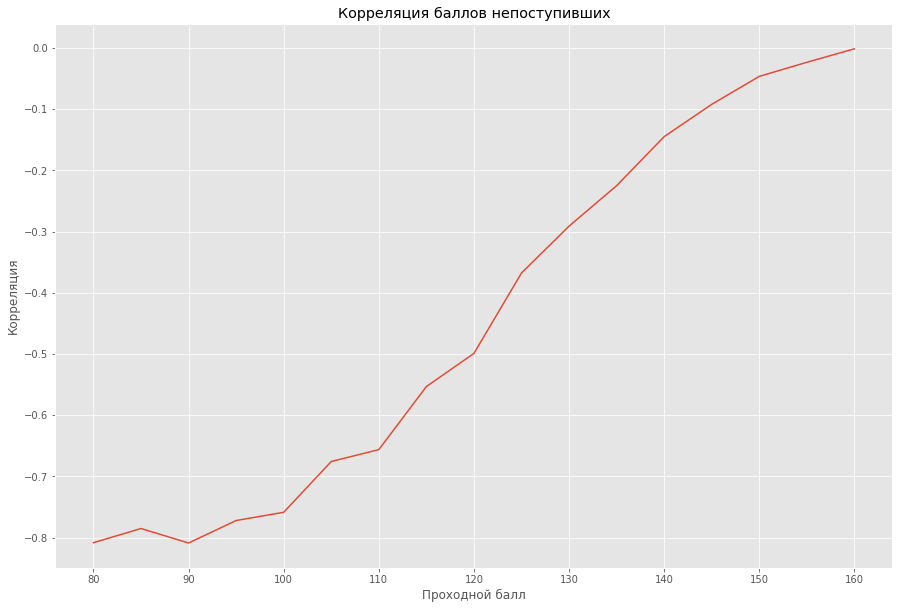

In [96]:
corr = np.array([])
for i in range(17):
    corr = np.append(corr, correlation(ne_pro_rus[i], ne_pro_mat[i]))

plt.figure(figsize=(15, 10))
plt.plot(n, corr)
plt.title('Корреляция баллов непоступивших')
plt.xlabel('Проходной балл')
plt.ylabel('Корреляция')
plt.show()

# Парадокс Штайна.

Ниф-Ниф, Наф-Наф и Нуф-Нуф качают пресс на карантине, чтобы приготовиться к встрече Волка :)
Количества подъёмов туловища в i-й день у поросят обозначим $X_i$, $Y_i$ и $Z_i$. Эти величины независимы и хорошо аппроксимируются нормальным распределением $X_i \sim N (60, 100), Y_i \sim N (70, 100), Z_i \sim N (80, 100)$.

Карантин длится 100 дней. Волк не знает математических ожиданий (60, 70, 80), но знает дисперсии.
Волку удаётся подсмотреть, сколько раз поросята поднимают свои туловища.

Проведите $10^4$ симуляций карантина :)

а)

In [97]:
a = np.random.normal(60, 10, 1000000)
b = np.random.normal(70, 10, 1000000)
c = np.random.normal(80, 10, 1000000)

In [98]:
a = a.reshape(-1, 100)
b = b.reshape(-1, 100)
c = c.reshape(-1, 100)

In [99]:
a1 = []
for i in range(10000):
    a1.append(stats.norm.fit(a[i], fscale=10)[0])

In [100]:
b1 = []
for i in range(10000):
    b1.append(stats.norm.fit(b[i], fscale=10)[0])

In [101]:
c1 = []
for i in range(10000):
    c1.append(stats.norm.fit(c[i], fscale=10)[0])

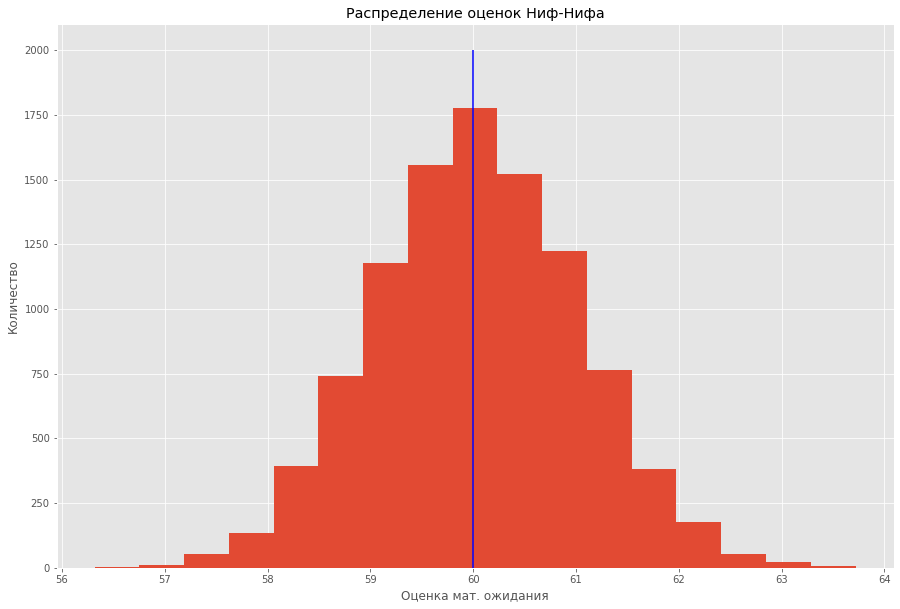

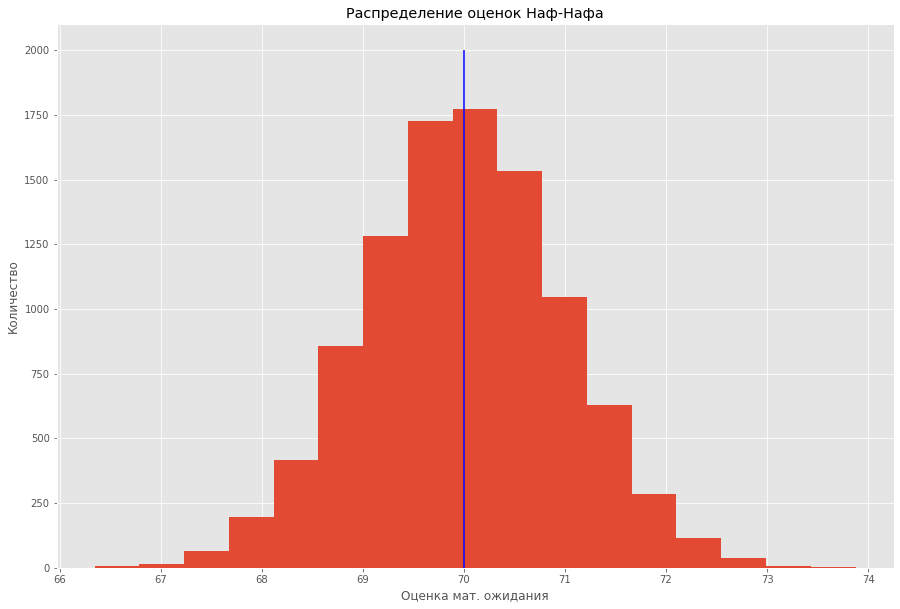

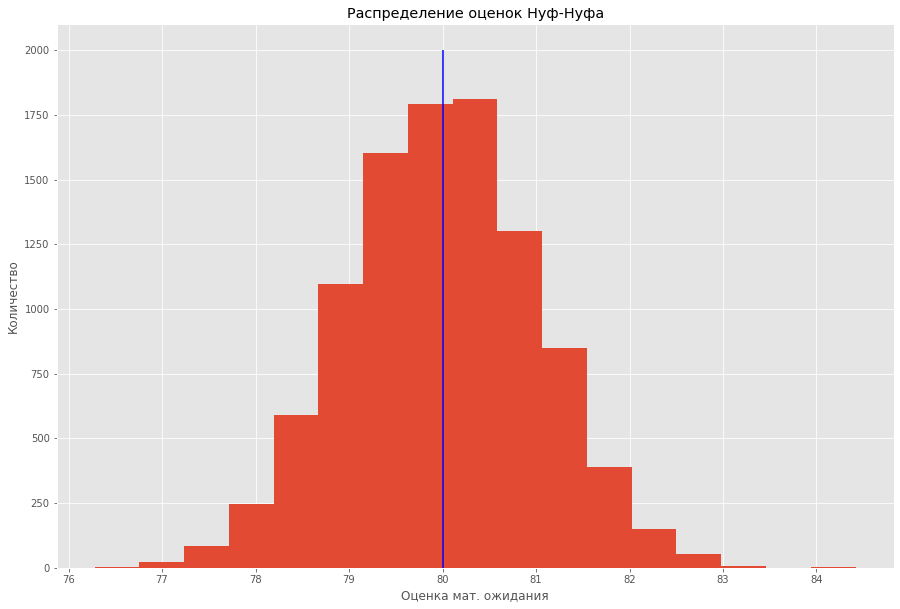

In [102]:
plt.figure(figsize=(15, 10))
plt.hist(a1, bins=17)
plt.xlabel('Оценка мат. ожидания')
plt.ylabel('Количество');
plt.title('Распределение оценок Ниф-Нифа')
plt.vlines(60, 0, 2000, color = 'b');

plt.figure(figsize=(15, 10))
plt.hist(b1, bins=17)
plt.xlabel('Оценка мат. ожидания')
plt.ylabel('Количество');
plt.title('Распределение оценок Наф-Нафа')
plt.vlines(70, 0, 2000, color = 'b');

plt.figure(figsize=(15, 10))
plt.hist(c1, bins=17)
plt.xlabel('Оценка мат. ожидания')
plt.ylabel('Количество');
plt.title('Распределение оценок Нуф-Нуфа')
plt.vlines(80, 0, 2000, color = 'b');

б)

In [103]:
a1 = np.array(a1)
b1 = np.array(b1)
c1 = np.array(c1)

In [104]:
s = (a1 - 60)**2 + (b1 - 70)**2 + (c1 - 80)**2
s

array([3.23275979, 2.58151782, 3.95597116, ..., 1.47273335, 0.28163298,
       2.47125697])

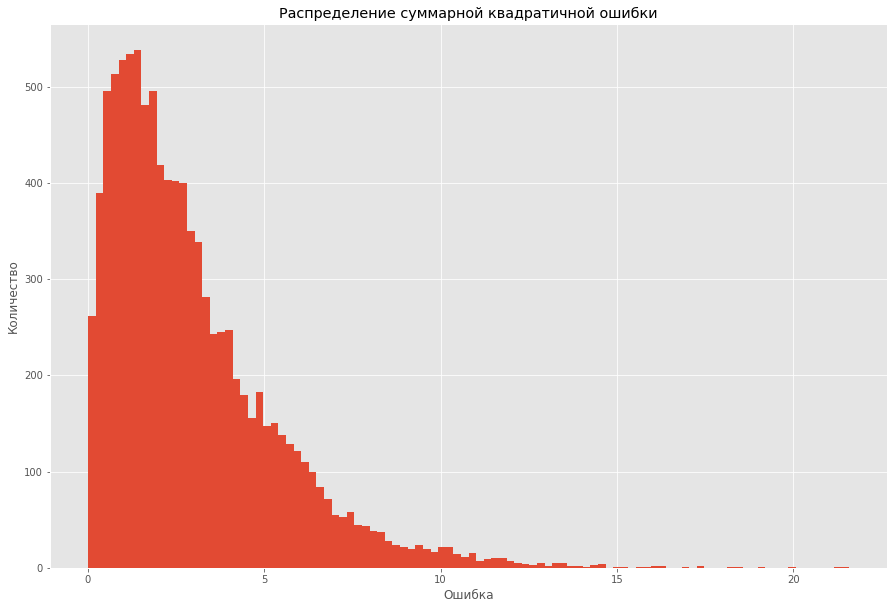

In [105]:
plt.figure(figsize=(15, 10))
plt.hist(s, bins=100)
plt.xlabel('Ошибка')
plt.ylabel('Количество');
plt.title('Распределение суммарной квадратичной ошибки');

Оценим мат. ожидание

In [106]:
np.mean(s)

2.953140936467417

в)

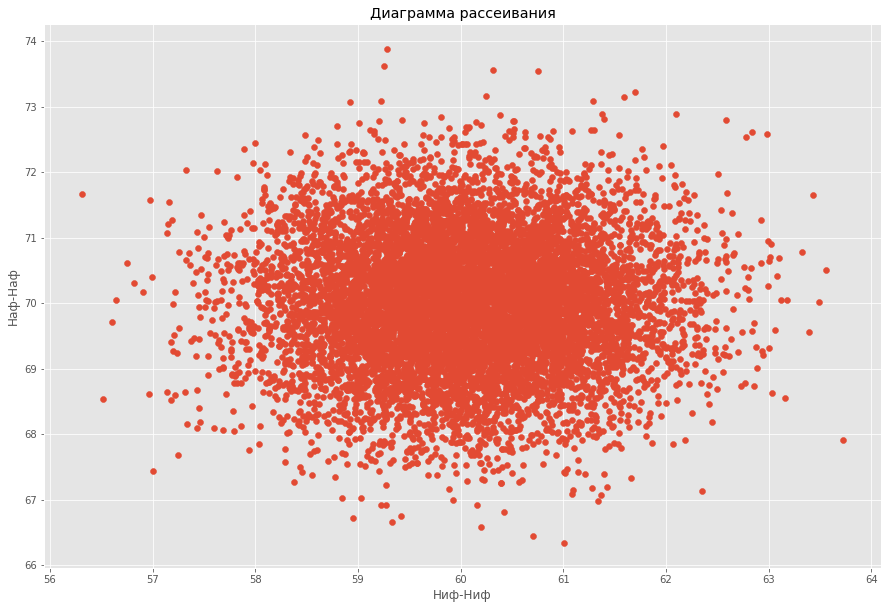

In [107]:
plt.figure(figsize=(15, 10))
plt.scatter(a1, b1)
plt.xlabel('Ниф-Ниф')
plt.ylabel('Наф-Наф');
plt.title('Диаграмма рассеивания');

Найдем выборочную корреляция

In [108]:
correlation(a1, b1)

0.0024557694273460726

г)

In [109]:
volk = np.append(a1, b1)

In [110]:
volk = np.append(volk, c1)

In [111]:
lis = (1 - 1 / np.linalg.norm(volk)**2) * volk

In [112]:
a11 = lis[0:10000]
b11 = lis[10000:20000]
c11 = lis[20000:30000]

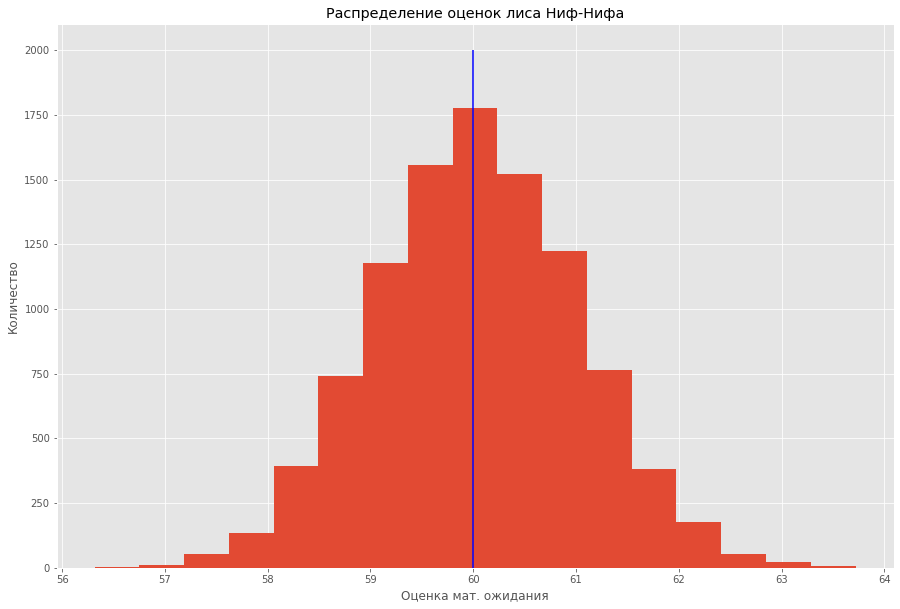

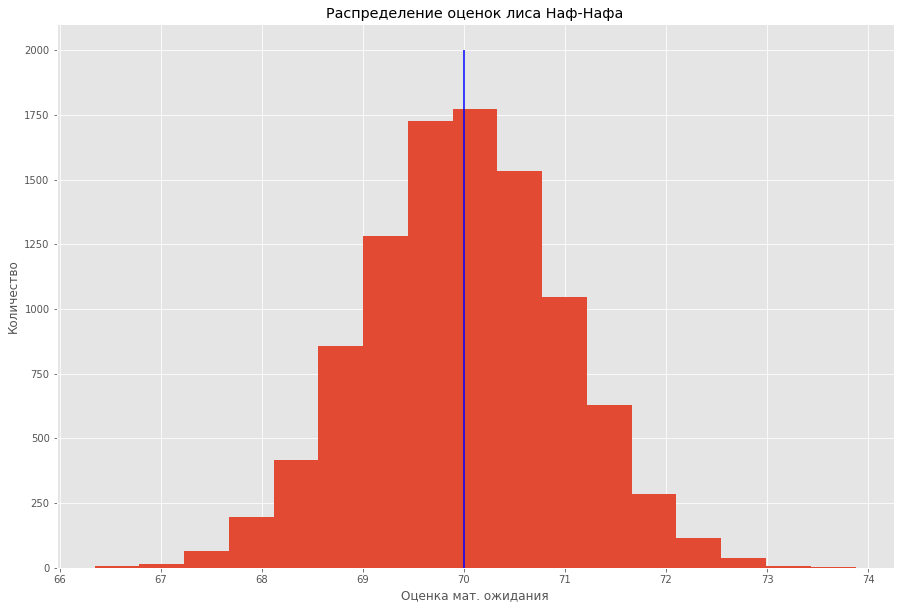

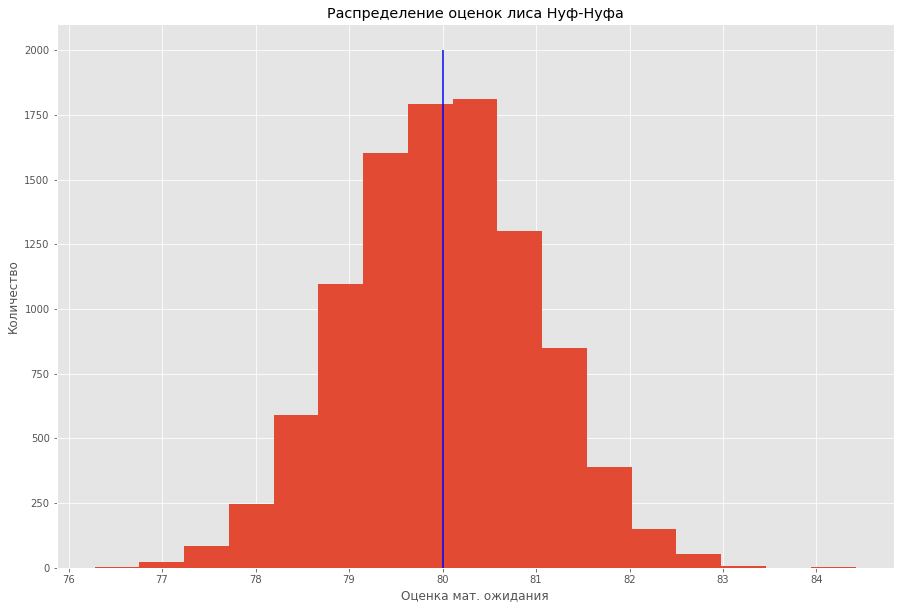

In [113]:
plt.figure(figsize=(15, 10))
plt.hist(a11, bins=17)
plt.xlabel('Оценка мат. ожидания')
plt.ylabel('Количество');
plt.title('Распределение оценок лиса Ниф-Нифа')
plt.vlines(60, 0, 2000, color = 'b');

plt.figure(figsize=(15, 10))
plt.hist(b11, bins=17)
plt.xlabel('Оценка мат. ожидания')
plt.ylabel('Количество');
plt.title('Распределение оценок лиса Наф-Нафа')
plt.vlines(70, 0, 2000, color = 'b');

plt.figure(figsize=(15, 10))
plt.hist(c11, bins=17)
plt.xlabel('Оценка мат. ожидания')
plt.ylabel('Количество');
plt.title('Распределение оценок лиса Нуф-Нуфа')
plt.vlines(80, 0, 2000, color = 'b');

In [114]:
s1 = (a11 - 60)**2 + (b11 - 70)**2 + (c11 - 80)**2
s1

array([3.23276118, 2.58151661, 3.95597163, ..., 1.47273448, 0.28163359,
       2.47125761])

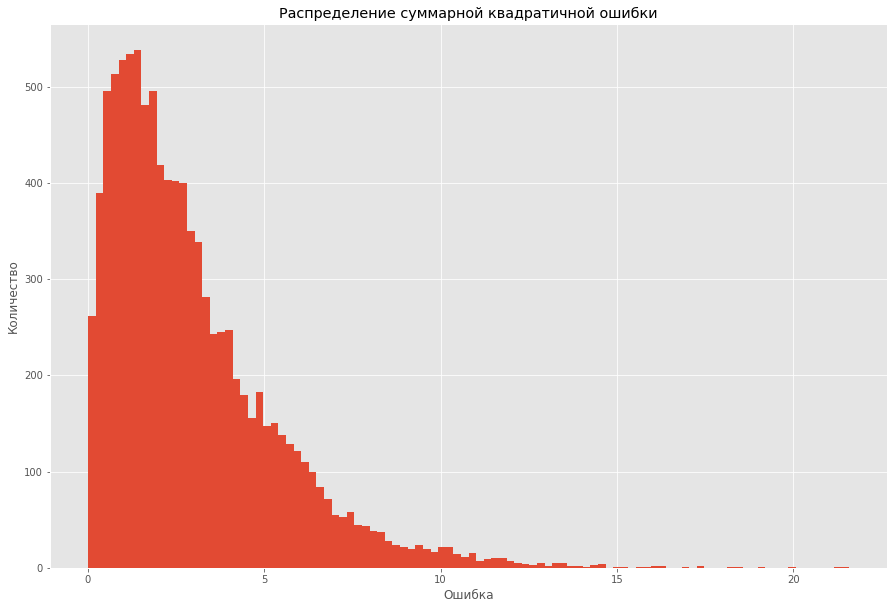

In [115]:
plt.figure(figsize=(15, 10))
plt.hist(s1, bins=100)
plt.xlabel('Ошибка')
plt.ylabel('Количество');
plt.title('Распределение суммарной квадратичной ошибки');

Оценим мат. ожидание

In [116]:
np.mean(s1)

2.953140882129332

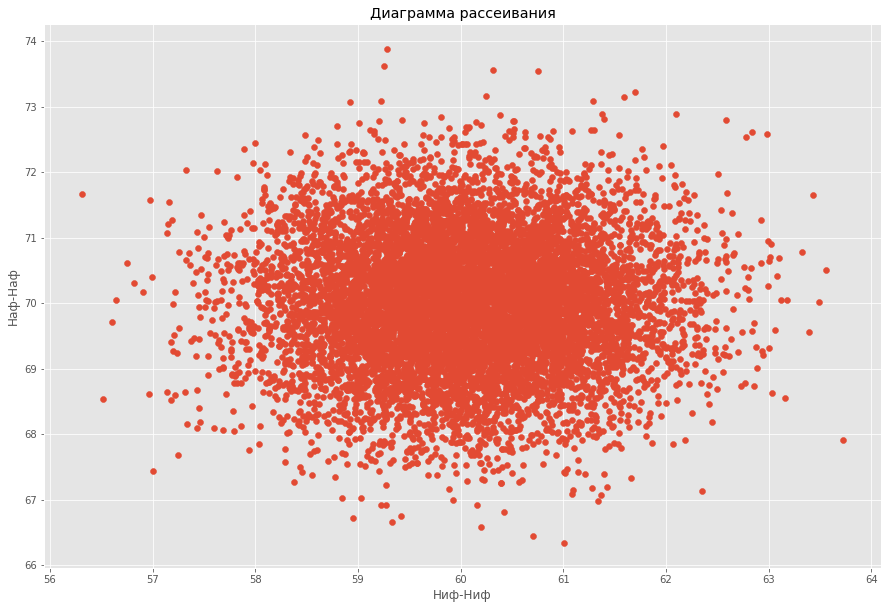

In [117]:
plt.figure(figsize=(15, 10))
plt.scatter(a11, b11)
plt.xlabel('Ниф-Ниф')
plt.ylabel('Наф-Наф');
plt.title('Диаграмма рассеивания');

Найдем выборочную корреляция

In [118]:
correlation(a11, b11)

0.0024557694273460383